<a href="https://colab.research.google.com/github/inayan60/PersonalPortifolio/blob/main/Gastos_Joinville.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Despesas da Prefeitura de Joinville - 2025

## 1. Objetivo
Explorar e visualizar os dados de despesas orçamentárias de Joinville em 2025,
direto do Portal da Transparência, para identificar:
- Principais unidades orçamentárias
- Categorias de gastos mais relevantes
- Evolução temporal das despesas

## 2. Fonte dos Dados
API oficial: [Portal da Transparência](https://transparencia.joinville.sc.gov.br/epublica-portal/rest/joinville/api/v1/despesaOrcamentaria)

## 3. Tecnologias
Python, Pandas, Seaborn, Matplotlib



# Importar bibliotecas

In [195]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import plotly.express as px


# Importar dados do Portal da Transparencia de Joinivlle

- Endereço da API: https://transparencia.joinville.sc.gov.br/epublica-portal/rest/joinville/api/v1/despesaOrcamentaria

In [ ]:
url_orcamentarias = "https://transparencia.joinville.sc.gov.br/epublica-portal/rest/joinville/api/v1/despesaOrcamentaria"
url_despesas = "https://transparencia.joinville.sc.gov.br/epublica-portal/rest/joinville/api/v1/despesa"

- Unidades Orçamentarias
-- Lista com todos os codigos

In [ ]:
unidades = [
    0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
    11, 12, 13, 15, 17, 18, 20, 21,
    22, 23, 24, 27, 28, 29, 30
]

- Usa for para importar todas as unidades da lista "unidades" criada acima e concatena todas no mesmo dataframe.

In [ ]:
dfs = []
years = range(2021, 2026)

for year in years:
    for cod in unidades:
        params = {
            "periodo_inicial": f"01/{year}",
            "periodo_final": f"12/{year}" if year < 2025 else "08/2025",
            "codigo_unidade": cod
        }
        r = requests.get(url_orcamentarias, params=params)
        data = r.json()

        if "registros" in data:
            registros = [r["registro"] for r in data["registros"]]
            df_temp = pd.json_normalize(registros)
            df_temp["codigo_unidade"] = cod
            df_temp["exercicio"] = year
            dfs.append(df_temp)

df_orc = pd.concat(dfs, ignore_index=True)

In [ ]:
df_orc.head()

,listMovimentos,classificacaoCompleta.classificacaoCompleta,despesa.funcao.codigo,despesa.funcao.denominacao,despesa.subfuncao.codigo,despesa.subfuncao.denominacao,despesa.programa.codigo,despesa.programa.denominacao,despesa.acao.codigo,despesa.acao.denominacao,...,unidadeOrcamentaria.codigo,unidadeOrcamentaria.denominacao,unidadeOrcamentaria.unidadeGestora.codigo,unidadeOrcamentaria.unidadeGestora.denominacao,unidadeOrcamentaria.unidadeOrcamentariaPai.codigo,unidadeOrcamentaria.unidadeOrcamentariaPai.denominacao,naturezaDespesa,codigo_unidade,exercicio,classificacao
0,"[{'dataMovimento': '2021-01-04', 'tipoMoviment...",0.4001.4.131.4.2162.0.33903990,4.0,Administração,131.0,Comunicação Social,4.0,Transparência e Comunicação,2162.0,Divulgação de atos oficiais - SAP,...,4001.0,Secretaria de Administração e Planejamento - SAP,0.0,Prefeitura Municipal de Joinville - PMJ,4000.0,Secretaria de Administração e Planejamento - SAP,NaN,0,2021,orçamentária
1,"[{'dataMovimento': '2021-01-04', 'tipoMoviment...",0.9001.8.306.8.2198.0.33504199,8.0,Assistência Social,306.0,Alimentação e Nutrição,8.0,Políticas Sociais,2198.0,Segurança alimentar - SAS,...,9001.0,Secretaria de Assistência Social - SAS,0.0,Prefeitura Municipal de Joinville - PMJ,9000.0,Secretaria de Assistência Social - SAS,NaN,0,2021,orçamentária
2,"[{'dataMovimento': '2021-01-04', 'tipoMoviment...",0.4001.4.122.1.2158.0.33903947,4.0,Administração,122.0,Administração Geral,1.0,Gestão administrativa,2158.0,Processos administrativos - SAP,...,4001.0,Secretaria de Administração e Planejamento - SAP,0.0,Prefeitura Municipal de Joinville - PMJ,4000.0,Secretaria de Administração e Planejamento - SAP,NaN,0,2021,orçamentária
3,"[{'dataMovimento': '2021-01-04', 'tipoMoviment...",0.60001.6.182.12.2222.0.33504199,6.0,Segurança Pública,182.0,Defesa Civil,12.0,Segurança Pública e Defesa Civil,2222.0,Ações de emergência de defesa civil - SEPROT,...,60001.0,Secretaria de Proteção Civil e Segurança Públi...,0.0,Prefeitura Municipal de Joinville - PMJ,60000.0,Secretaria de Proteção Civil e Segurança Públi...,NaN,0,2021,orçamentária
4,"[{'dataMovimento': '2021-01-04', 'tipoMoviment...",0.6001.12.361.1.2172.0.33903916,12.0,Educação,361.0,Ensino Fundamental,1.0,Gestão administrativa,2172.0,Processos administrativos ensino fundamental -...,...,6001.0,Secretaria de Educação - SED,0.0,Prefeitura Municipal de Joinville - PMJ,6000.0,Secretaria de Educação - SED,NaN,0,2021,orçamentária


In [ ]:
df_orc.shape

(209621, 34)

In [ ]:
df_orc.columns

Index(['listMovimentos', 'classificacaoCompleta.classificacaoCompleta',
       'despesa.funcao.codigo', 'despesa.funcao.denominacao',
       'despesa.subfuncao.codigo', 'despesa.subfuncao.denominacao',
       'despesa.programa.codigo', 'despesa.programa.denominacao',
       'despesa.acao.codigo', 'despesa.acao.denominacao',
       'naturezaDespesa.categoriaEconomica.codigo',
       'naturezaDespesa.categoriaEconomica.codigoCompleto',
       'naturezaDespesa.categoriaEconomica.denominacao',
       'naturezaDespesa.grupo.codigo', 'naturezaDespesa.grupo.codigoCompleto',
       'naturezaDespesa.grupo.denominacao',
       'naturezaDespesa.modalidadeAplicacao.codigo',
       'naturezaDespesa.modalidadeAplicacao.codigoCompleto',
       'naturezaDespesa.modalidadeAplicacao.denominacao',
       'naturezaDespesa.elemento.codigo',
       'naturezaDespesa.elemento.codigoCompleto',
       'naturezaDespesa.elemento.denominacao', 'fonteRecurso.codigo',
       'fonteRecurso.denominacao', 'exercicio.ex

Adicionar coluna classificação para categorizar despesas antes do merge.

In [ ]:
df_orc['classificacao'] = 'orçamentária'

In [ ]:
dfs = []
years = range(2021, 2026)

for year in years:
    for cod in unidades:
        params = {
            "periodo_inicial": f"01/{year}",
            "periodo_final": f"12/{year}" if year < 2025 else "08/2025",
            "codigo_unidade": cod
        }
        r = requests.get(url_despesas, params=params)
        data = r.json()

        if "registros" in data:
            registros = [r["registro"] for r in data["registros"]]
            df_tempdp = pd.json_normalize(registros)
            df_tempdp["codigo_unidade"] = cod
            df_tempdp["exercicio"] = year
            dfs.append(df_temp)

df_dp = pd.concat(dfs, ignore_index=True)

In [ ]:
df_dp.head()

,listMovimentos,classificacaoCompleta.classificacaoCompleta,despesa.funcao.codigo,despesa.funcao.denominacao,despesa.subfuncao.codigo,despesa.subfuncao.denominacao,despesa.programa.codigo,despesa.programa.denominacao,despesa.acao.codigo,despesa.acao.denominacao,...,exercicio.exercicio,unidadeOrcamentaria.codigo,unidadeOrcamentaria.denominacao,unidadeOrcamentaria.unidadeGestora.codigo,unidadeOrcamentaria.unidadeGestora.denominacao,unidadeOrcamentaria.unidadeOrcamentariaPai.codigo,unidadeOrcamentaria.unidadeOrcamentariaPai.denominacao,naturezaDespesa,codigo_unidade,exercicio
0,"[{'dataMovimento': '2025-01-01', 'tipoMoviment...",30.77001.17.122.3.3348.0.33903928,17,Saneamento,122,Administração Geral,3,Joinville Simples,3348,Apoio administrativo às ações de saneamento bá...,...,2025,77001,Fundo Municipal de Saneamento Básico - FMSB,30,Fundo Municipal de Saneamento Básico - FMSB,77000,Fundo Municipal de Saneamento Básico - FMSB,NaN,30,2025
1,"[{'dataMovimento': '2025-06-02', 'tipoMoviment...",30.77001.17.122.3.3348.0.33903928,17,Saneamento,122,Administração Geral,3,Joinville Simples,3348,Apoio administrativo às ações de saneamento bá...,...,2025,77001,Fundo Municipal de Saneamento Básico - FMSB,30,Fundo Municipal de Saneamento Básico - FMSB,77000,Fundo Municipal de Saneamento Básico - FMSB,NaN,30,2025
2,"[{'dataMovimento': '2025-01-01', 'tipoMoviment...",30.77001.17.122.3.3348.0.33903928,17,Saneamento,122,Administração Geral,3,Joinville Simples,3348,Apoio administrativo às ações de saneamento bá...,...,2025,77001,Fundo Municipal de Saneamento Básico - FMSB,30,Fundo Municipal de Saneamento Básico - FMSB,77000,Fundo Municipal de Saneamento Básico - FMSB,NaN,30,2025
3,"[{'dataMovimento': '2025-04-04', 'tipoMoviment...",30.77001.17.122.3.3348.0.33903928,17,Saneamento,122,Administração Geral,3,Joinville Simples,3348,Apoio administrativo às ações de saneamento bá...,...,2025,77001,Fundo Municipal de Saneamento Básico - FMSB,30,Fundo Municipal de Saneamento Básico - FMSB,77000,Fundo Municipal de Saneamento Básico - FMSB,NaN,30,2025
4,"[{'dataMovimento': '2025-01-02', 'tipoMoviment...",30.77001.17.122.3.3348.0.33903928,17,Saneamento,122,Administração Geral,3,Joinville Simples,3348,Apoio administrativo às ações de saneamento bá...,...,2025,77001,Fundo Municipal de Saneamento Básico - FMSB,30,Fundo Municipal de Saneamento Básico - FMSB,77000,Fundo Municipal de Saneamento Básico - FMSB,NaN,30,2025


In [ ]:
df_dp.shape

(3250, 34)

In [ ]:
df_orc.columns

Index(['listMovimentos', 'classificacaoCompleta.classificacaoCompleta',
       'despesa.funcao.codigo', 'despesa.funcao.denominacao',
       'despesa.subfuncao.codigo', 'despesa.subfuncao.denominacao',
       'despesa.programa.codigo', 'despesa.programa.denominacao',
       'despesa.acao.codigo', 'despesa.acao.denominacao',
       'naturezaDespesa.categoriaEconomica.codigo',
       'naturezaDespesa.categoriaEconomica.codigoCompleto',
       'naturezaDespesa.categoriaEconomica.denominacao',
       'naturezaDespesa.grupo.codigo', 'naturezaDespesa.grupo.codigoCompleto',
       'naturezaDespesa.grupo.denominacao',
       'naturezaDespesa.modalidadeAplicacao.codigo',
       'naturezaDespesa.modalidadeAplicacao.codigoCompleto',
       'naturezaDespesa.modalidadeAplicacao.denominacao',
       'naturezaDespesa.elemento.codigo',
       'naturezaDespesa.elemento.codigoCompleto',
       'naturezaDespesa.elemento.denominacao', 'fonteRecurso.codigo',
       'fonteRecurso.denominacao', 'exercicio.ex

In [ ]:
df_dp['classificacao'] = 'execução'

In [ ]:
df_consolidade = pd.concat([df_orc, df_dp], ignore_index=True)

In [ ]:
df_consolidade.shape

(212871, 35)

In [ ]:
pd.set_option('display.max_colwidth', None)
df_exploded = df_consolidade.explode('listMovimentos')
df_exploded = df_exploded.reset_index(drop=True)
df_exploded['listMovimentos'].head()

,listMovimentos
0,"{'dataMovimento': '2021-01-04', 'tipoMovimento': 'Emissão de empenho', 'valorMovimento': 322760.33}"
1,"{'dataMovimento': '2021-01-14', 'tipoMovimento': 'Anulação de empenho', 'valorMovimento': 322760.33}"
2,"{'dataMovimento': '2021-01-04', 'tipoMovimento': 'Emissão de empenho', 'valorMovimento': 210286.53}"
3,"{'dataMovimento': '2021-01-08', 'tipoMovimento': 'Liquidação de empenho', 'valorMovimento': 70095.51}"
4,"{'dataMovimento': '2021-01-08', 'tipoMovimento': 'Pagamento de empenho', 'valorMovimento': 70095.51}"


In [ ]:
df_movimentos = pd.json_normalize(df_exploded['listMovimentos'])
df_movimentos['dataMovimento'] = pd.to_datetime(df_movimentos['dataMovimento']).dt.strftime('%d/%m/%Y')
display(df_movimentos.head())

,dataMovimento,tipoMovimento,valorMovimento
0,04/01/2021,Emissão de empenho,322760.33
1,14/01/2021,Anulação de empenho,322760.33
2,04/01/2021,Emissão de empenho,210286.53
3,08/01/2021,Liquidação de empenho,70095.51
4,08/01/2021,Pagamento de empenho,70095.51


In [ ]:
df_despesas = pd.concat([df_exploded.drop(columns=['listMovimentos']), df_movimentos], axis=1)
df_despesas['data'] = pd.to_datetime(df_despesas['dataMovimento'], format='%d/%m/%Y')
df_despesas["valor"] = pd.to_numeric(df_despesas["valorMovimento"], errors='coerce')

df_despesas.head()

,classificacaoCompleta.classificacaoCompleta,despesa.funcao.codigo,despesa.funcao.denominacao,despesa.subfuncao.codigo,despesa.subfuncao.denominacao,despesa.programa.codigo,despesa.programa.denominacao,despesa.acao.codigo,despesa.acao.denominacao,naturezaDespesa.categoriaEconomica.codigo,...,unidadeOrcamentaria.unidadeOrcamentariaPai.denominacao,naturezaDespesa,codigo_unidade,exercicio,classificacao,dataMovimento,tipoMovimento,valorMovimento,data,valor
0,0.4001.4.131.4.2162.0.33903990,4.0,Administração,131.0,Comunicação Social,4.0,Transparência e Comunicação,2162.0,Divulgação de atos oficiais - SAP,3.0,...,Secretaria de Administração e Planejamento - SAP,NaN,0,2021,orçamentária,04/01/2021,Emissão de empenho,322760.33,2021-01-04,322760.33
1,0.4001.4.131.4.2162.0.33903990,4.0,Administração,131.0,Comunicação Social,4.0,Transparência e Comunicação,2162.0,Divulgação de atos oficiais - SAP,3.0,...,Secretaria de Administração e Planejamento - SAP,NaN,0,2021,orçamentária,14/01/2021,Anulação de empenho,322760.33,2021-01-14,322760.33
2,0.9001.8.306.8.2198.0.33504199,8.0,Assistência Social,306.0,Alimentação e Nutrição,8.0,Políticas Sociais,2198.0,Segurança alimentar - SAS,3.0,...,Secretaria de Assistência Social - SAS,NaN,0,2021,orçamentária,04/01/2021,Emissão de empenho,210286.53,2021-01-04,210286.53
3,0.9001.8.306.8.2198.0.33504199,8.0,Assistência Social,306.0,Alimentação e Nutrição,8.0,Políticas Sociais,2198.0,Segurança alimentar - SAS,3.0,...,Secretaria de Assistência Social - SAS,NaN,0,2021,orçamentária,08/01/2021,Liquidação de empenho,70095.51,2021-01-08,70095.51
4,0.9001.8.306.8.2198.0.33504199,8.0,Assistência Social,306.0,Alimentação e Nutrição,8.0,Políticas Sociais,2198.0,Segurança alimentar - SAS,3.0,...,Secretaria de Assistência Social - SAS,NaN,0,2021,orçamentária,08/01/2021,Pagamento de empenho,70095.51,2021-01-08,70095.51


# Limpar dataframe

- Lista todas colunas com dados em branco

In [ ]:
df_despesas.isnull().sum()

,0
classificacaoCompleta.classificacaoCompleta,0
despesa.funcao.codigo,0
despesa.funcao.denominacao,0
despesa.subfuncao.codigo,0
despesa.subfuncao.denominacao,0
despesa.programa.codigo,13937
despesa.programa.denominacao,13937
despesa.acao.codigo,13937
despesa.acao.denominacao,13937
naturezaDespesa.categoriaEconomica.codigo,134845


- Exclui colunas com dados em branco.

In [ ]:
# Exclui colunas que tiverem 100% dos valores nulos
df_limpa = df_despesas.dropna(axis=1, how='all')

# Identifica as colunas excluídas
colunas_excluidas = df_despesas.columns.difference(df_limpa.columns)

print("Shape do DataFrame original:", df_despesas.shape)
print("Shape do DataFrame limpo:", df_limpa.shape)
print("\nColuna(s) excluída(s):", list(colunas_excluidas))

Shape do DataFrame original: (1187404, 39)
Shape do DataFrame limpo: (1187404, 38)

Coluna(s) excluída(s): ['naturezaDespesa']


In [ ]:
df_despesas['naturezaDespesa'].unique()

array([nan], dtype=object)

In [ ]:
df_limpa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187404 entries, 0 to 1187403
Data columns (total 38 columns):
 #   Column                                                  Non-Null Count    Dtype         
---  ------                                                  --------------    -----         
 0   classificacaoCompleta.classificacaoCompleta             1187404 non-null  object        
 1   despesa.funcao.codigo                                   1187404 non-null  float64       
 2   despesa.funcao.denominacao                              1187404 non-null  object        
 3   despesa.subfuncao.codigo                                1187404 non-null  float64       
 4   despesa.subfuncao.denominacao                           1187404 non-null  object        
 5   despesa.programa.codigo                                 1173467 non-null  float64       
 6   despesa.programa.denominacao                            1173467 non-null  object        
 7   despesa.acao.codigo                 

In [45]:
duplicados = df_limpa['classificacaoCompleta.classificacaoCompleta'].duplicated()

display(df_limpa[duplicados].head())

,classificacaoCompleta.classificacaoCompleta,despesa.funcao.codigo,despesa.funcao.denominacao,despesa.subfuncao.codigo,despesa.subfuncao.denominacao,despesa.programa.codigo,despesa.programa.denominacao,despesa.acao.codigo,despesa.acao.denominacao,naturezaDespesa.categoriaEconomica.codigo,...,unidadeOrcamentaria.unidadeOrcamentariaPai.codigo,unidadeOrcamentaria.unidadeOrcamentariaPai.denominacao,codigo_unidade,exercicio,classificacao,dataMovimento,tipoMovimento,valorMovimento,data,valor
1,0.4001.4.131.4.2162.0.33903990,4.0,Administração,131.0,Comunicação Social,4.0,Transparência e Comunicação,2162.0,Divulgação de atos oficiais - SAP,3.0,...,4000.0,Secretaria de Administração e Planejamento - SAP,0,2021,orçamentária,14/01/2021,Anulação de empenho,322760.33,2021-01-14,322760.33
3,0.9001.8.306.8.2198.0.33504199,8.0,Assistência Social,306.0,Alimentação e Nutrição,8.0,Políticas Sociais,2198.0,Segurança alimentar - SAS,3.0,...,9000.0,Secretaria de Assistência Social - SAS,0,2021,orçamentária,08/01/2021,Liquidação de empenho,70095.51,2021-01-08,70095.51
4,0.9001.8.306.8.2198.0.33504199,8.0,Assistência Social,306.0,Alimentação e Nutrição,8.0,Políticas Sociais,2198.0,Segurança alimentar - SAS,3.0,...,9000.0,Secretaria de Assistência Social - SAS,0,2021,orçamentária,08/01/2021,Pagamento de empenho,70095.51,2021-01-08,70095.51
5,0.9001.8.306.8.2198.0.33504199,8.0,Assistência Social,306.0,Alimentação e Nutrição,8.0,Políticas Sociais,2198.0,Segurança alimentar - SAS,3.0,...,9000.0,Secretaria de Assistência Social - SAS,0,2021,orçamentária,29/01/2021,Liquidação de empenho,70095.51,2021-01-29,70095.51
6,0.9001.8.306.8.2198.0.33504199,8.0,Assistência Social,306.0,Alimentação e Nutrição,8.0,Políticas Sociais,2198.0,Segurança alimentar - SAS,3.0,...,9000.0,Secretaria de Assistência Social - SAS,0,2021,orçamentária,04/02/2021,Pagamento de empenho,70095.51,2021-02-04,70095.51


In [47]:
df_agrupado = df_limpa.groupby('classificacaoCompleta.classificacaoCompleta').first().reset_index()

In [50]:
duplicados = df_agrupado['classificacaoCompleta.classificacaoCompleta'].duplicated()

display(df_agrupado[duplicados].head())

,classificacaoCompleta.classificacaoCompleta,despesa.funcao.codigo,despesa.funcao.denominacao,despesa.subfuncao.codigo,despesa.subfuncao.denominacao,despesa.programa.codigo,despesa.programa.denominacao,despesa.acao.codigo,despesa.acao.denominacao,naturezaDespesa.categoriaEconomica.codigo,...,unidadeOrcamentaria.unidadeOrcamentariaPai.codigo,unidadeOrcamentaria.unidadeOrcamentariaPai.denominacao,codigo_unidade,exercicio,classificacao,dataMovimento,tipoMovimento,valorMovimento,data,valor


In [51]:
df_agrupado.head()

,classificacaoCompleta.classificacaoCompleta,despesa.funcao.codigo,despesa.funcao.denominacao,despesa.subfuncao.codigo,despesa.subfuncao.denominacao,despesa.programa.codigo,despesa.programa.denominacao,despesa.acao.codigo,despesa.acao.denominacao,naturezaDespesa.categoriaEconomica.codigo,...,unidadeOrcamentaria.unidadeOrcamentariaPai.codigo,unidadeOrcamentaria.unidadeOrcamentariaPai.denominacao,codigo_unidade,exercicio,classificacao,dataMovimento,tipoMovimento,valorMovimento,data,valor
0,0.10001.16.451.1.3068.0.,16.0,Habitação,451.0,Infra-Estrutura Urbana,1.0,Joinville Social,3068.0,Aquisição/Construção/Reforma - SEHAB,NaN,...,10000.0,Secretaria de Habitação - SEHAB,0,2022,orçamentária,01/01/2022,Fixação de Despesa,10000.0,2022-01-01,10000.0
1,0.10001.16.451.1.3083.0.,16.0,Habitação,451.0,Infra-Estrutura Urbana,1.0,Joinville Social,3083.0,Viva Bem Joinville - SEHAB,NaN,...,10000.0,Secretaria de Habitação - SEHAB,0,2023,orçamentária,01/01/2023,Fixação de Despesa,10000000.0,2023-01-01,10000000.0
2,0.10001.16.451.14.2074.0.,16.0,Habitação,451.0,Infra-Estrutura Urbana,14.0,"Infraestrutura, zeladoria pública e Mobilidade",2074.0,Aquisição/Construção/Reforma - SEHAB,NaN,...,10000.0,Secretaria de Habitação - SEHAB,0,2021,orçamentária,01/01/2021,Fixação de Despesa,10000.0,2021-01-01,10000.0
3,0.10001.16.482.0.0.0.31901302,16.0,Habitação,482.0,Habitação Urbana,NaN,None,NaN,None,3.0,...,10000.0,Secretaria de Habitação - SEHAB,0,2022,orçamentária,01/01/2022,Inscrição de restos a pagar,0.0,2022-01-01,0.0
4,0.10001.16.482.0.0.0.31911303,16.0,Habitação,482.0,Habitação Urbana,NaN,None,NaN,None,3.0,...,10000.0,Secretaria de Habitação - SEHAB,0,2022,orçamentária,01/01/2022,Inscrição de restos a pagar,0.0,2022-01-01,0.0


In [54]:
df_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8521 entries, 0 to 8520
Data columns (total 38 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   classificacaoCompleta.classificacaoCompleta             8521 non-null   object        
 1   despesa.funcao.codigo                                   8521 non-null   float64       
 2   despesa.funcao.denominacao                              8521 non-null   object        
 3   despesa.subfuncao.codigo                                8521 non-null   float64       
 4   despesa.subfuncao.denominacao                           8521 non-null   object        
 5   despesa.programa.codigo                                 7812 non-null   float64       
 6   despesa.programa.denominacao                            7812 non-null   object        
 7   despesa.acao.codigo                                     7812

In [85]:
novos_nomes = {
    'classificacaoCompleta.classificacaoCompleta': 'classificacao_completa',
    'despesa.funcao.denominacao': 'funcao',
    'despesa.subfuncao.denominacao': 'subfuncao',
    'despesa.programa.denominacao': 'programa',
    'despesa.acao.denominacao': 'acao',
    'naturezaDespesa.categoriaEconomica.denominacao': 'categoria_economica',
    'naturezaDespesa.grupo.denominacao': 'grupo_natureza',
    'naturezaDespesa.elemento.denominacao': 'elemento_natureza',
    'unidadeOrcamentaria.denominacao': 'unidade_orcamentaria',
    'unidadeOrcamentaria.unidadeOrcamentariaPai.denominacao': 'unidade_pai',
    'exercicio.exercicio': 'exercicio_fiscal',
    'fonteRecurso.denominacao': 'fonte_recurso',
    'valorMovimento': 'valor_movimento'
}

df_cat = df_agrupado.rename(columns=novos_nomes)
print(df_cat.columns)
df_cat.head()

Index(['classificacao_completa', 'despesa.funcao.codigo', 'funcao',
       'despesa.subfuncao.codigo', 'subfuncao', 'despesa.programa.codigo',
       'programa', 'despesa.acao.codigo', 'acao',
       'naturezaDespesa.categoriaEconomica.codigo',
       'naturezaDespesa.categoriaEconomica.codigoCompleto',
       'categoria_economica', 'naturezaDespesa.grupo.codigo',
       'naturezaDespesa.grupo.codigoCompleto', 'grupo_natureza',
       'naturezaDespesa.modalidadeAplicacao.codigo',
       'naturezaDespesa.modalidadeAplicacao.codigoCompleto',
       'naturezaDespesa.modalidadeAplicacao.denominacao',
       'naturezaDespesa.elemento.codigo',
       'naturezaDespesa.elemento.codigoCompleto', 'elemento_natureza',
       'fonteRecurso.codigo', 'fonte_recurso', 'exercicio_fiscal',
       'unidadeOrcamentaria.codigo', 'unidade_orcamentaria',
       'unidadeOrcamentaria.unidadeGestora.codigo',
       'unidadeOrcamentaria.unidadeGestora.denominacao',
       'unidadeOrcamentaria.unidadeOrcamentari

,classificacao_completa,despesa.funcao.codigo,funcao,despesa.subfuncao.codigo,subfuncao,despesa.programa.codigo,programa,despesa.acao.codigo,acao,naturezaDespesa.categoriaEconomica.codigo,...,unidadeOrcamentaria.unidadeOrcamentariaPai.codigo,unidade_pai,codigo_unidade,exercicio,classificacao,dataMovimento,tipoMovimento,valor_movimento,data,valor
0,0.10001.16.451.1.3068.0.,16.0,Habitação,451.0,Infra-Estrutura Urbana,1.0,Joinville Social,3068.0,Aquisição/Construção/Reforma - SEHAB,NaN,...,10000.0,Secretaria de Habitação - SEHAB,0,2022,orçamentária,01/01/2022,Fixação de Despesa,10000.0,2022-01-01,10000.0
1,0.10001.16.451.1.3083.0.,16.0,Habitação,451.0,Infra-Estrutura Urbana,1.0,Joinville Social,3083.0,Viva Bem Joinville - SEHAB,NaN,...,10000.0,Secretaria de Habitação - SEHAB,0,2023,orçamentária,01/01/2023,Fixação de Despesa,10000000.0,2023-01-01,10000000.0
2,0.10001.16.451.14.2074.0.,16.0,Habitação,451.0,Infra-Estrutura Urbana,14.0,"Infraestrutura, zeladoria pública e Mobilidade",2074.0,Aquisição/Construção/Reforma - SEHAB,NaN,...,10000.0,Secretaria de Habitação - SEHAB,0,2021,orçamentária,01/01/2021,Fixação de Despesa,10000.0,2021-01-01,10000.0
3,0.10001.16.482.0.0.0.31901302,16.0,Habitação,482.0,Habitação Urbana,NaN,None,NaN,None,3.0,...,10000.0,Secretaria de Habitação - SEHAB,0,2022,orçamentária,01/01/2022,Inscrição de restos a pagar,0.0,2022-01-01,0.0
4,0.10001.16.482.0.0.0.31911303,16.0,Habitação,482.0,Habitação Urbana,NaN,None,NaN,None,3.0,...,10000.0,Secretaria de Habitação - SEHAB,0,2022,orçamentária,01/01/2022,Inscrição de restos a pagar,0.0,2022-01-01,0.0


In [86]:
colunas_texto = ['programa', 'acao', 'categoria_economica', 'unidade_pai']
for col in colunas_texto:
    df_cat[col] = df_cat[col].fillna('nao informado')
df_cat.head()

,classificacao_completa,despesa.funcao.codigo,funcao,despesa.subfuncao.codigo,subfuncao,despesa.programa.codigo,programa,despesa.acao.codigo,acao,naturezaDespesa.categoriaEconomica.codigo,...,unidadeOrcamentaria.unidadeOrcamentariaPai.codigo,unidade_pai,codigo_unidade,exercicio,classificacao,dataMovimento,tipoMovimento,valor_movimento,data,valor
0,0.10001.16.451.1.3068.0.,16.0,Habitação,451.0,Infra-Estrutura Urbana,1.0,Joinville Social,3068.0,Aquisição/Construção/Reforma - SEHAB,NaN,...,10000.0,Secretaria de Habitação - SEHAB,0,2022,orçamentária,01/01/2022,Fixação de Despesa,10000.0,2022-01-01,10000.0
1,0.10001.16.451.1.3083.0.,16.0,Habitação,451.0,Infra-Estrutura Urbana,1.0,Joinville Social,3083.0,Viva Bem Joinville - SEHAB,NaN,...,10000.0,Secretaria de Habitação - SEHAB,0,2023,orçamentária,01/01/2023,Fixação de Despesa,10000000.0,2023-01-01,10000000.0
2,0.10001.16.451.14.2074.0.,16.0,Habitação,451.0,Infra-Estrutura Urbana,14.0,"Infraestrutura, zeladoria pública e Mobilidade",2074.0,Aquisição/Construção/Reforma - SEHAB,NaN,...,10000.0,Secretaria de Habitação - SEHAB,0,2021,orçamentária,01/01/2021,Fixação de Despesa,10000.0,2021-01-01,10000.0
3,0.10001.16.482.0.0.0.31901302,16.0,Habitação,482.0,Habitação Urbana,NaN,nao informado,NaN,nao informado,3.0,...,10000.0,Secretaria de Habitação - SEHAB,0,2022,orçamentária,01/01/2022,Inscrição de restos a pagar,0.0,2022-01-01,0.0
4,0.10001.16.482.0.0.0.31911303,16.0,Habitação,482.0,Habitação Urbana,NaN,nao informado,NaN,nao informado,3.0,...,10000.0,Secretaria de Habitação - SEHAB,0,2022,orçamentária,01/01/2022,Inscrição de restos a pagar,0.0,2022-01-01,0.0


In [87]:
df_cat.columns

Index(['classificacao_completa', 'despesa.funcao.codigo', 'funcao',
       'despesa.subfuncao.codigo', 'subfuncao', 'despesa.programa.codigo',
       'programa', 'despesa.acao.codigo', 'acao',
       'naturezaDespesa.categoriaEconomica.codigo',
       'naturezaDespesa.categoriaEconomica.codigoCompleto',
       'categoria_economica', 'naturezaDespesa.grupo.codigo',
       'naturezaDespesa.grupo.codigoCompleto', 'grupo_natureza',
       'naturezaDespesa.modalidadeAplicacao.codigo',
       'naturezaDespesa.modalidadeAplicacao.codigoCompleto',
       'naturezaDespesa.modalidadeAplicacao.denominacao',
       'naturezaDespesa.elemento.codigo',
       'naturezaDespesa.elemento.codigoCompleto', 'elemento_natureza',
       'fonteRecurso.codigo', 'fonte_recurso', 'exercicio_fiscal',
       'unidadeOrcamentaria.codigo', 'unidade_orcamentaria',
       'unidadeOrcamentaria.unidadeGestora.codigo',
       'unidadeOrcamentaria.unidadeGestora.denominacao',
       'unidadeOrcamentaria.unidadeOrcamentari

In [99]:
colunas_principais = [
    'classificacao_completa',
    'exercicio',
    'classificacao',
    'tipoMovimento',
    'unidade_orcamentaria',
    'funcao',
    'subfuncao',
    'programa',
    'acao',
    'categoria_economica',
    'grupo_natureza',
    'elemento_natureza',
    'dataMovimento',
    'fonte_recurso',
    'valor_movimento',
    'data' # Adicionando a coluna 'data'
]

df_redux = df_cat[colunas_principais].copy()

df_redux.head()

,classificacao_completa,exercicio,classificacao,tipoMovimento,unidade_orcamentaria,funcao,subfuncao,programa,acao,categoria_economica,grupo_natureza,elemento_natureza,dataMovimento,fonte_recurso,valor_movimento,data
0,0.10001.16.451.1.3068.0.,2022,orçamentária,Fixação de Despesa,Secretaria de Habitação - SEHAB,Habitação,Infra-Estrutura Urbana,Joinville Social,Aquisição/Construção/Reforma - SEHAB,nao informado,None,None,01/01/2022,Recursos Ordinários,10000.0,2022-01-01
1,0.10001.16.451.1.3083.0.,2023,orçamentária,Fixação de Despesa,Secretaria de Habitação - SEHAB,Habitação,Infra-Estrutura Urbana,Joinville Social,Viva Bem Joinville - SEHAB,nao informado,None,None,01/01/2023,Operação de Crédito Externas - Outros Programas,10000000.0,2023-01-01
2,0.10001.16.451.14.2074.0.,2021,orçamentária,Fixação de Despesa,Secretaria de Habitação - SEHAB,Habitação,Infra-Estrutura Urbana,"Infraestrutura, zeladoria pública e Mobilidade",Aquisição/Construção/Reforma - SEHAB,nao informado,None,None,01/01/2021,Recursos Ordinários,10000.0,2021-01-01
3,0.10001.16.482.0.0.0.31901302,2022,orçamentária,Inscrição de restos a pagar,Secretaria de Habitação - SEHAB,Habitação,Habitação Urbana,nao informado,nao informado,Despesas Correntes,Pessoal e Encargos Sociais,Obrigações Patronais,01/01/2022,Recursos Ordinários,0.0,2022-01-01
4,0.10001.16.482.0.0.0.31911303,2022,orçamentária,Inscrição de restos a pagar,Secretaria de Habitação - SEHAB,Habitação,Habitação Urbana,nao informado,nao informado,Despesas Correntes,Pessoal e Encargos Sociais,Obrigações Patronais,01/01/2022,Recursos Ordinários,0.0,2022-01-01


In [100]:
colunas_texto = ['grupo_natureza', 'elemento_natureza']
for col in colunas_texto:
    df_redux[col] = df_redux[col].fillna('nao informado')
df_redux.head()

,classificacao_completa,exercicio,classificacao,tipoMovimento,unidade_orcamentaria,funcao,subfuncao,programa,acao,categoria_economica,grupo_natureza,elemento_natureza,dataMovimento,fonte_recurso,valor_movimento,data
0,0.10001.16.451.1.3068.0.,2022,orçamentária,Fixação de Despesa,Secretaria de Habitação - SEHAB,Habitação,Infra-Estrutura Urbana,Joinville Social,Aquisição/Construção/Reforma - SEHAB,nao informado,nao informado,nao informado,01/01/2022,Recursos Ordinários,10000.0,2022-01-01
1,0.10001.16.451.1.3083.0.,2023,orçamentária,Fixação de Despesa,Secretaria de Habitação - SEHAB,Habitação,Infra-Estrutura Urbana,Joinville Social,Viva Bem Joinville - SEHAB,nao informado,nao informado,nao informado,01/01/2023,Operação de Crédito Externas - Outros Programas,10000000.0,2023-01-01
2,0.10001.16.451.14.2074.0.,2021,orçamentária,Fixação de Despesa,Secretaria de Habitação - SEHAB,Habitação,Infra-Estrutura Urbana,"Infraestrutura, zeladoria pública e Mobilidade",Aquisição/Construção/Reforma - SEHAB,nao informado,nao informado,nao informado,01/01/2021,Recursos Ordinários,10000.0,2021-01-01
3,0.10001.16.482.0.0.0.31901302,2022,orçamentária,Inscrição de restos a pagar,Secretaria de Habitação - SEHAB,Habitação,Habitação Urbana,nao informado,nao informado,Despesas Correntes,Pessoal e Encargos Sociais,Obrigações Patronais,01/01/2022,Recursos Ordinários,0.0,2022-01-01
4,0.10001.16.482.0.0.0.31911303,2022,orçamentária,Inscrição de restos a pagar,Secretaria de Habitação - SEHAB,Habitação,Habitação Urbana,nao informado,nao informado,Despesas Correntes,Pessoal e Encargos Sociais,Obrigações Patronais,01/01/2022,Recursos Ordinários,0.0,2022-01-01


In [101]:
df_redux.isnull().sum()

,0
classificacao_completa,0
exercicio,0
classificacao,0
tipoMovimento,0
unidade_orcamentaria,0
funcao,0
subfuncao,0
programa,0
acao,0
categoria_economica,0


# Plots

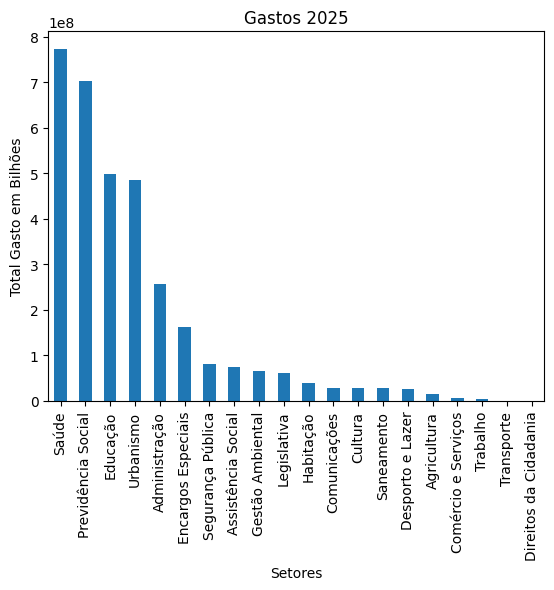

In [102]:
gastos_jlle = df_redux.groupby("funcao")["valor_movimento"].sum().sort_values(ascending=False)

gastos_jlle.plot(kind="bar")
plt.ylabel("Total Gasto em Bilhões")
plt.xlabel("Setores")
plt.title("Gastos 2025")
plt.show()

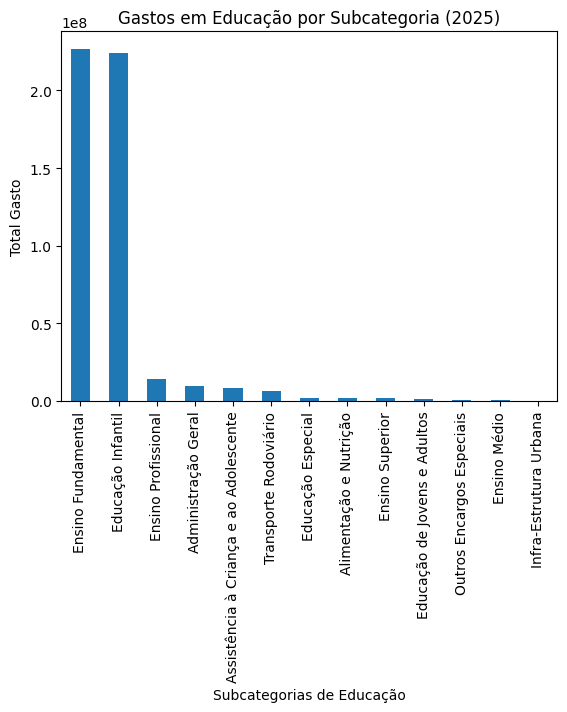

In [123]:
gastos_educacao = df_redux[df_redux['funcao'] == 'Educação']

gastos_fonte_educacao = gastos_educacao.groupby("subfuncao")["valor_movimento"].sum().sort_values(ascending=False)

gastos_fonte_educacao.plot(kind="bar")
plt.ylabel("Total Gasto")
plt.xlabel("Subcategorias de Educação")
plt.title("Gastos em Educação por Subcategoria (2025)")
plt.show()

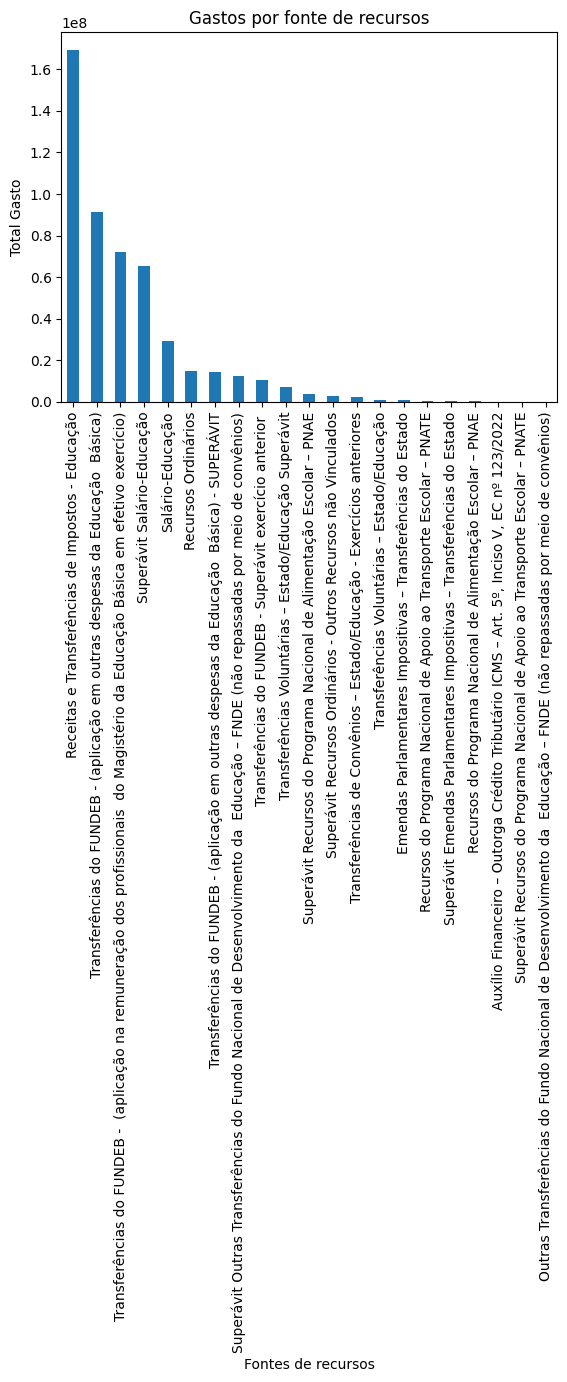

In [104]:
gastos_educacao_ = df_redux[df_redux['funcao'] == 'Educação']

gastos_subfuncao_educacao = gastos_educacao.groupby("fonte_recurso")["valor_movimento"].sum().sort_values(ascending=False)

gastos_subfuncao_educacao.plot(kind="bar")
plt.ylabel("Total Gasto")
plt.xlabel("Fontes de recursos")
plt.title("Gastos por fonte de recursos")
plt.show()

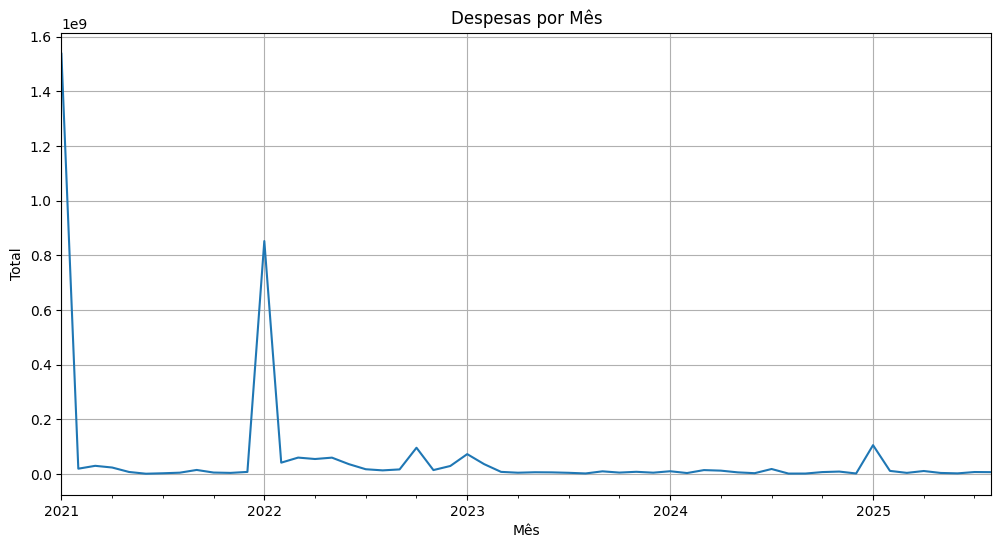

In [105]:
df_redux['month'] = df_redux['data'].dt.to_period('M')

depesasmensais = df_redux.groupby('month')['valor_movimento'].sum()

plt.figure(figsize=(12, 6))
depesasmensais.plot(kind='line')
plt.title('Despesas por Mês')
plt.xlabel('Mês')
plt.ylabel('Total')
plt.grid(True)
plt.show()

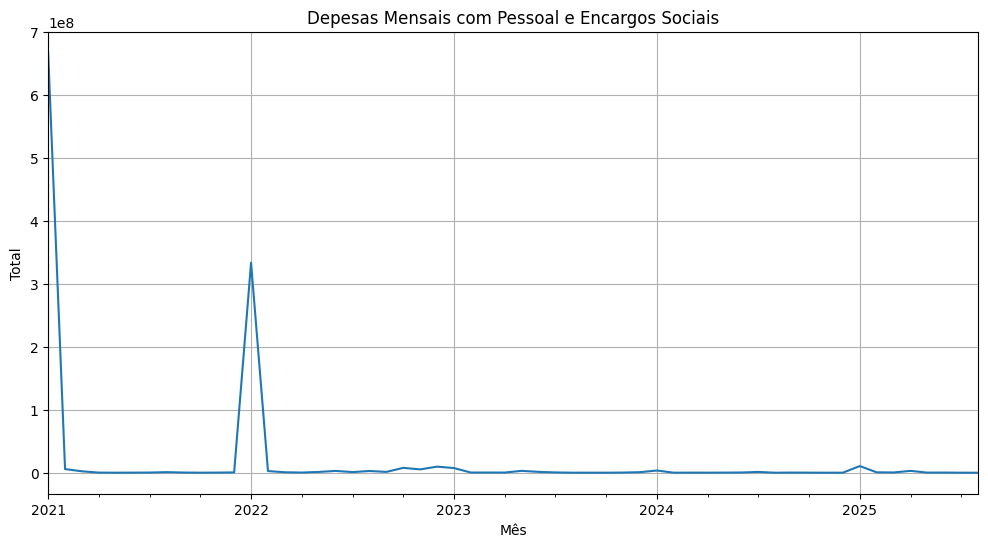

In [106]:
gastos_pessoal = df_redux[df_redux['grupo_natureza'] == 'Pessoal e Encargos Sociais']

gasto_pessoas = gastos_pessoal.groupby('month')['valor_movimento'].sum()

plt.figure(figsize=(12, 6))
gasto_pessoas.plot(kind='line')
plt.title('Depesas Mensais com Pessoal e Encargos Sociais')
plt.xlabel('Mês')
plt.ylabel('Total')
plt.grid(True)
plt.show()

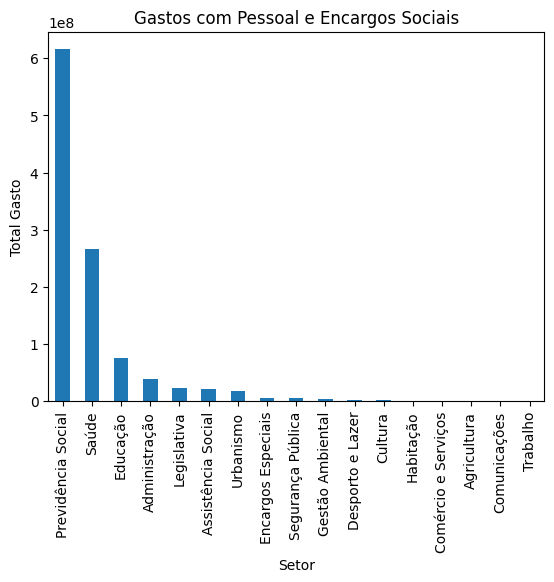

In [107]:
gastos_folha = df_redux[df_redux['grupo_natureza'] == 'Pessoal e Encargos Sociais']

gastos_fonte_folha = gastos_folha.groupby("funcao")["valor_movimento"].sum().sort_values(ascending=False)

gastos_fonte_folha.plot(kind="bar")
plt.ylabel("Total Gasto")
plt.xlabel("Setor")
plt.title("Gastos com Pessoal e Encargos Sociais")
plt.show()

/tmp/ipython-input-2108702585.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gastos_jlle.index, y=gastos_jlle.values, palette="viridis")


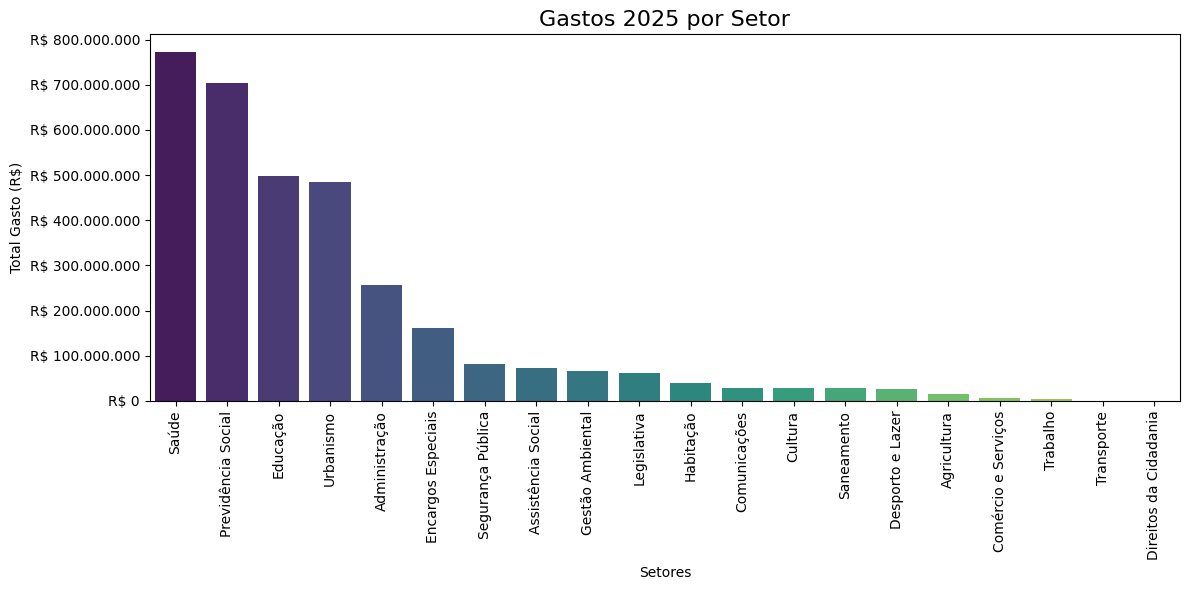

In [108]:
gastos_jlle = df_redux.groupby("funcao")["valor_movimento"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=gastos_jlle.index, y=gastos_jlle.values, palette="viridis")
plt.ylabel("Total Gasto (R$)", fontsize=10)
plt.xlabel("Setores")
plt.title("Gastos 2025 por Setor", fontsize=16)
plt.xticks(rotation=90)

formatter = mticker.FuncFormatter(lambda x, _: f'R$ {x:,.0f}'.replace(',', '.'))
plt.gca().yaxis.set_major_formatter(formatter)


plt.tight_layout()
plt.show()

/tmp/ipython-input-886925068.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gastos_fonte_folha.index, y=gastos_fonte_folha.values, palette="viridis")


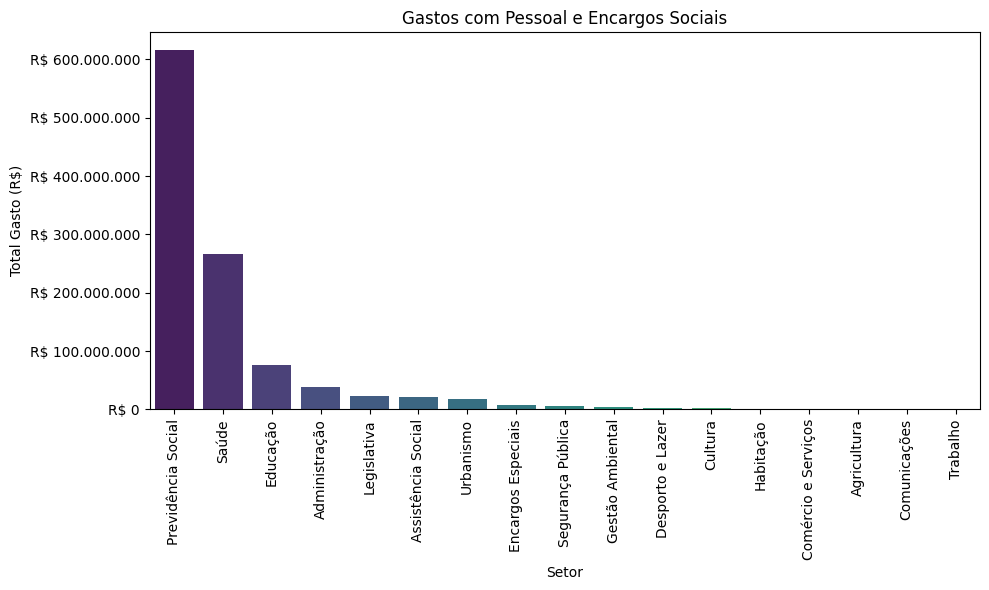

In [109]:
gastos_folha = df_redux[df_redux['grupo_natureza'] == 'Pessoal e Encargos Sociais']

gastos_fonte_folha = gastos_folha.groupby("funcao")["valor_movimento"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=gastos_fonte_folha.index, y=gastos_fonte_folha.values, palette="viridis")
plt.ylabel("Total Gasto (R$)")
plt.xlabel("Setor")
plt.title("Gastos com Pessoal e Encargos Sociais")
plt.xticks(rotation=90)

formatter = mticker.FuncFormatter(lambda x, _: f'R$ {x:,.0f}'.replace(',', '.'))
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

/tmp/ipython-input-2044615326.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gastos_janeiro_natureza.index, y=gastos_janeiro_natureza.values, palette="viridis")


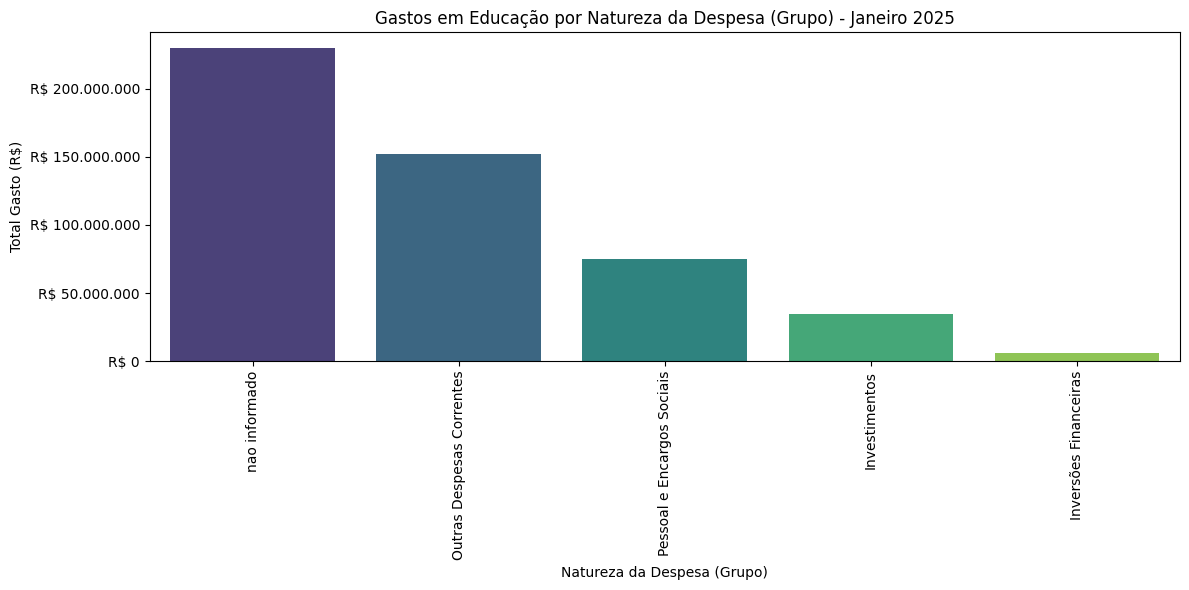

In [118]:
gastos_edu = df_redux[df_redux['funcao'] == 'Educação']
gastos_edu_january = gastos_edu[gastos_edu['data'].dt.month == 1]

gastos_janeiro_natureza = gastos_edu.groupby('grupo_natureza')['valor_movimento'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=gastos_janeiro_natureza.index, y=gastos_janeiro_natureza.values, palette="viridis")
plt.ylabel("Total Gasto (R$)")
plt.xlabel("Natureza da Despesa (Grupo)")
plt.title("Gastos em Educação por Natureza da Despesa (Grupo) - Janeiro 2025")
plt.xticks(rotation=90)

formatter = mticker.FuncFormatter(lambda x, _: f'R$ {x:,.0f}'.replace(',', '.'))
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

/tmp/ipython-input-886925068.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gastos_fonte_folha.index, y=gastos_fonte_folha.values, palette="viridis")


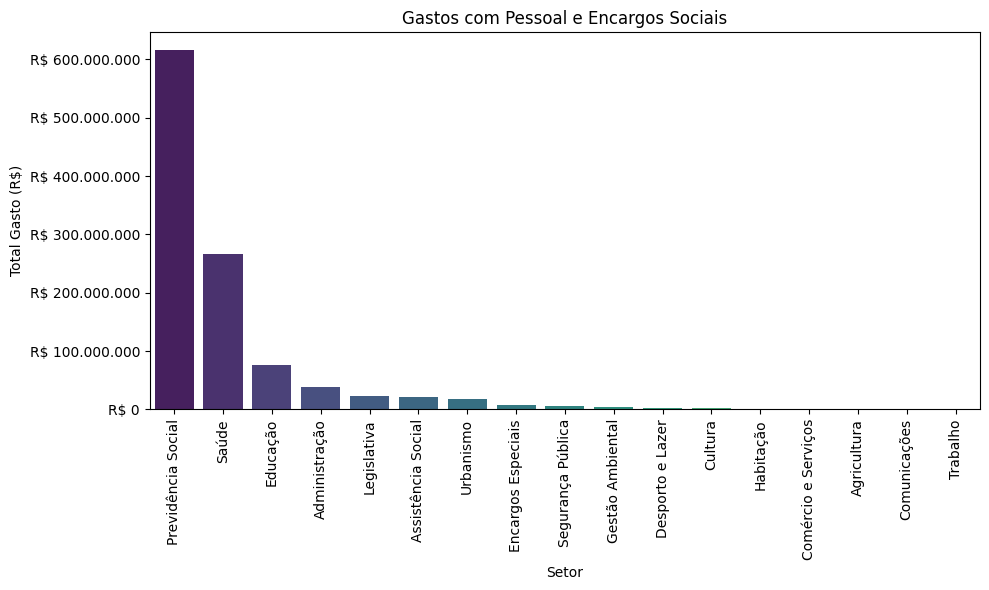

In [119]:
gastos_folha = df_redux[df_redux['grupo_natureza'] == 'Pessoal e Encargos Sociais']

gastos_fonte_folha = gastos_folha.groupby("funcao")["valor_movimento"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=gastos_fonte_folha.index, y=gastos_fonte_folha.values, palette="viridis")
plt.ylabel("Total Gasto (R$)")
plt.xlabel("Setor")
plt.title("Gastos com Pessoal e Encargos Sociais")
plt.xticks(rotation=90)

formatter = mticker.FuncFormatter(lambda x, _: f'R$ {x:,.0f}'.replace(',', '.'))
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

/tmp/ipython-input-1972438822.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gastos_folha.index, y=gastos_folha.values, palette="viridis")


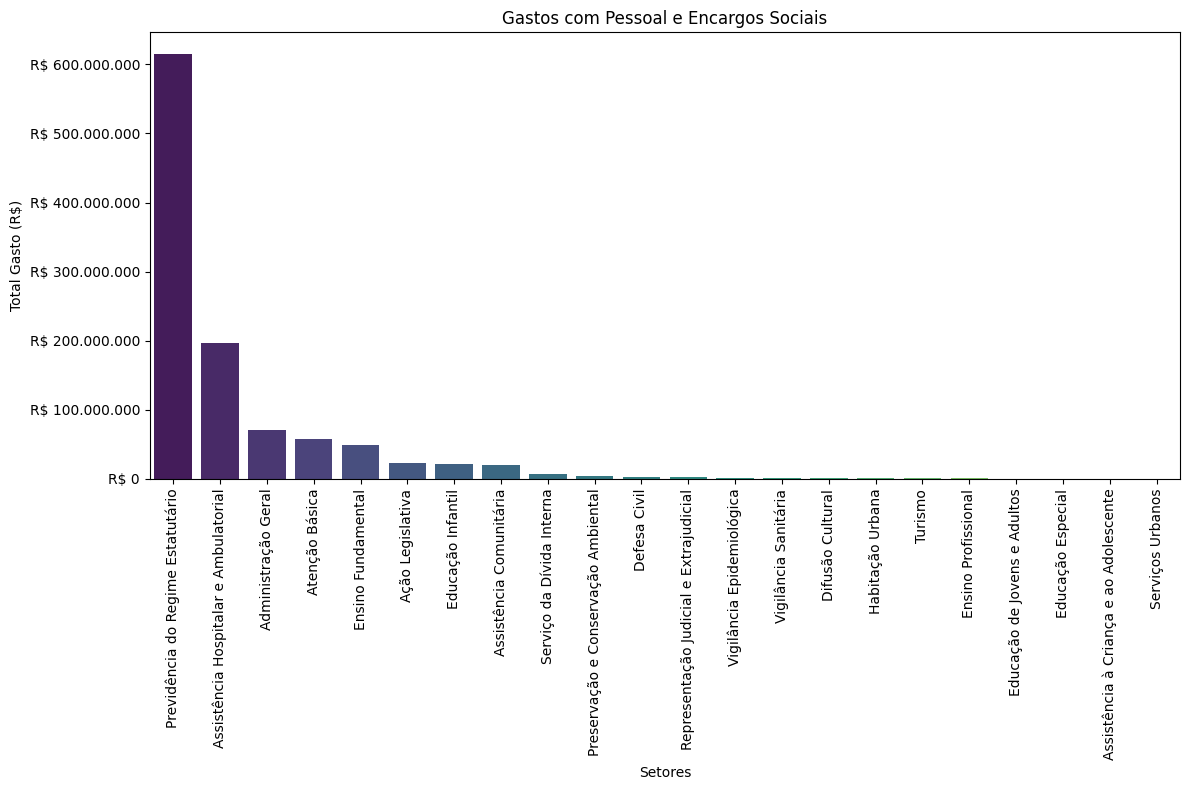

In [132]:
pv_socials = df_redux[df_redux['grupo_natureza'] == 'Pessoal e Encargos Sociais']

gastos_folha = pv_socials.groupby("subfuncao")["valor_movimento"].sum().sort_values(ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x=gastos_folha.index, y=gastos_folha.values, palette="viridis")
plt.ylabel("Total Gasto (R$)")
plt.xlabel("Setores")
plt.title("Gastos com Pessoal e Encargos Sociais")
plt.xticks(rotation=90)

formatter = mticker.FuncFormatter(lambda x, _: f'R$ {x:,.0f}'.replace(',', '.'))
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

In [227]:

df_treemap_filtered = df_redux[df_redux['valor_movimento'] > 0].reset_index()
df_treemap_filtered['log_valor_movimento'] = np.log(df_treemap_filtered['valor_movimento'] + 1)


fig = px.treemap(
    df_treemap_filtered,
    path=['fonte_recurso', 'funcao', 'subfuncao','grupo_natureza'],
    values='valor_movimento',
    color='log_valor_movimento',
    color_continuous_scale='sunsetdark',
    title='Proporção de Gastos por Fonte de Recurso, Função e Subfunção',
    custom_data=['grupo_natureza'],
    height=700,
)

fig.update_traces(
    root_color="azure",
    textinfo="label+percent parent",
    hovertemplate=(
        '<b>%{label}</b><br>' +
        '<b>Valor:</b> R$ %{value:,.2f}<br>' +
        '<b>Natureza:</b> %{customdata[0]}<br>' +
        '<extra></extra>'
    )
)

fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25)
)

fig.show()

In [225]:
gastos_educacao_ = df_redux[df_redux['funcao'] == 'Educação']
df_treemap = gastos_educacao_[gastos_educacao_['valor_movimento'] > 0].reset_index()
df_treemap_filtered['log_valor_movimento'] = np.log(df_treemap_filtered['valor_movimento'] + 1)

fig = px.treemap(
    df_treemap,
    path=['fonte_recurso','grupo_natureza'],
    values='valor_movimento',
    color='valor_movimento',
    color_continuous_scale='sunsetdark',
    title='Proporção de Gastos por Fonte de Recurso, Função e Subfunção',
    labels={
        'valor_movimento': 'Gasto Total (R$)' #
    },
    custom_data=['grupo_natureza'],
    height=1000,
)

fig.update_traces(
    root_color="azure",
    textinfo="label+percent parent",
    hovertemplate=(
        '<b>%{label}</b><br>' +
        '<b>Valor:</b> R$ %{value:,.2f}<br>' +
        '<b>Natureza:</b> %{customdata[0]}<br>' +
        '<extra></extra>'
    )
)

fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25)
)
fig.update_traces(
    textfont=dict(size=22)
)

fig.show()

/tmp/ipython-input-598314130.py:50: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




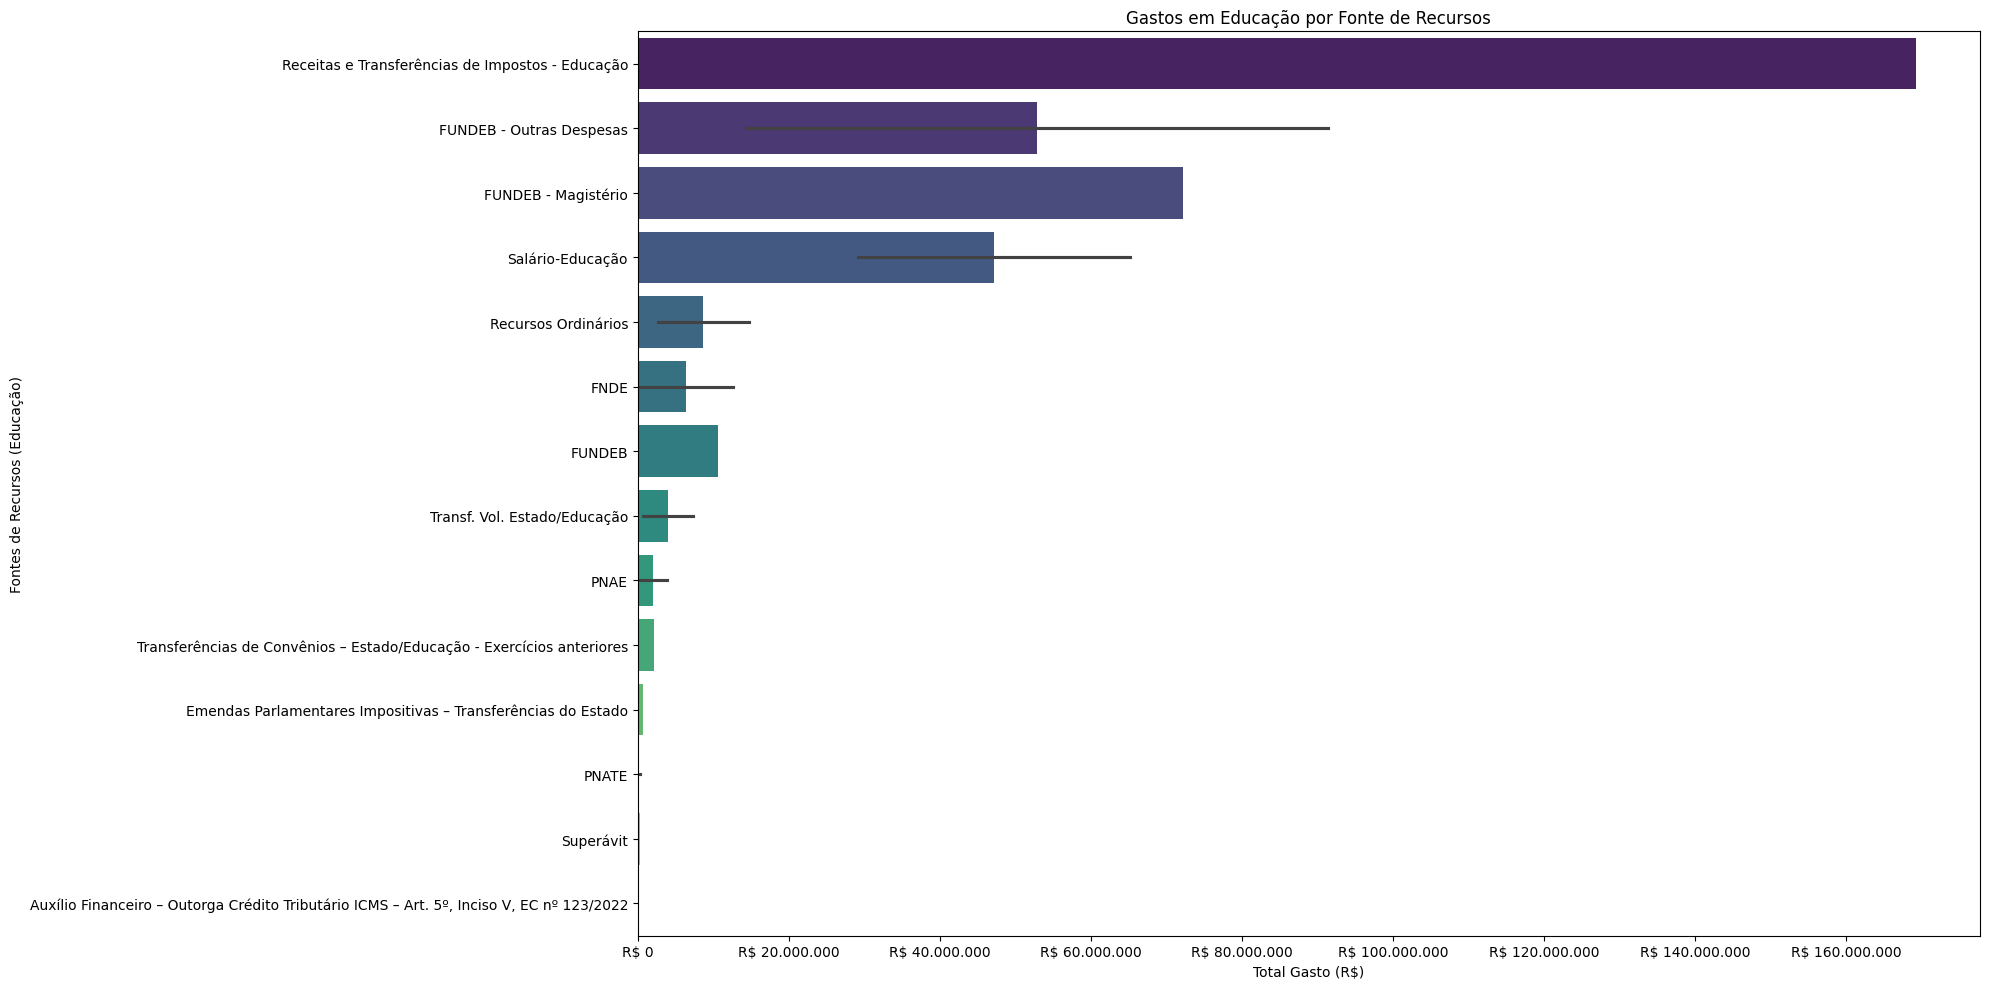

In [209]:
gastos_educacao_ = df_redux[df_redux['funcao'] == 'Educação']

gastos_fonte_educacao = gastos_educacao_.groupby("fonte_recurso")["valor_movimento"].sum().sort_values(ascending=False)

# Function to shorten resource names
def shorten_resource_name(name):
    if 'Transferências do FUNDEB' in name:
        if 'Magistério' in name:
            return 'FUNDEB - Magistério'
        elif 'outras despesas' in name:
            return 'FUNDEB - Outras Despesas'
        elif 'Complementação da União - VAAR' in name:
             return 'FUNDEB - VAAR'
        else:
            return 'FUNDEB'
    elif 'Recursos Ordinários' in name:
        return 'Recursos Ordinários'
    elif 'PNATE' in name:
        return 'PNATE'
    elif 'EMENDAS' in name:
        return 'EMENDAS PARLAMENTARES'
    elif 'FNDE' in name:
        return 'FNDE'
    elif 'Salário-Educação' in name:
        return 'Salário-Educação'
    elif 'Programa Nacional de Alimentação Escolar' in name:
        return 'PNAE'
    elif 'Transferências Voluntárias – Estado/Educação' in name:
        return 'Transf. Vol. Estado/Educação'
    elif 'Superávit' in name:
         if 'Salário-Educação' in name:
             return 'Superávit Salário-Educação'
         elif 'Recursos Ordinários' in name:
             return 'Superávit Recursos Ordinários'
         elif 'FUNDEB' in name:
             return 'Superávit FUNDEB'
         elif 'PNATE' in name:
             return 'Superávit PNATE'
         elif 'PNAE' in name:
             return 'Superávit PNAE'
         else:
             return 'Superávit'

    return name


gastos_fonte_educacao.index = gastos_fonte_educacao.index.map(shorten_resource_name)

plt.figure(figsize=(20, 10)) # Adjust figure size for horizontal plot
sns.barplot(x=gastos_fonte_educacao.values, y=gastos_fonte_educacao.index, palette="viridis") # Swap x and y
plt.xlabel("Total Gasto (R$)") # Swap x and y labels
plt.ylabel("Fontes de Recursos (Educação)")
plt.title("Gastos em Educação por Fonte de Recursos")


# Format x-axis labels (since it's horizontal now)
formatter = mticker.FuncFormatter(lambda x, _: f'R$ {x:,.0f}'.replace(',', '.'))
plt.gca().xaxis.set_major_formatter(formatter)


plt.tight_layout()
plt.show()

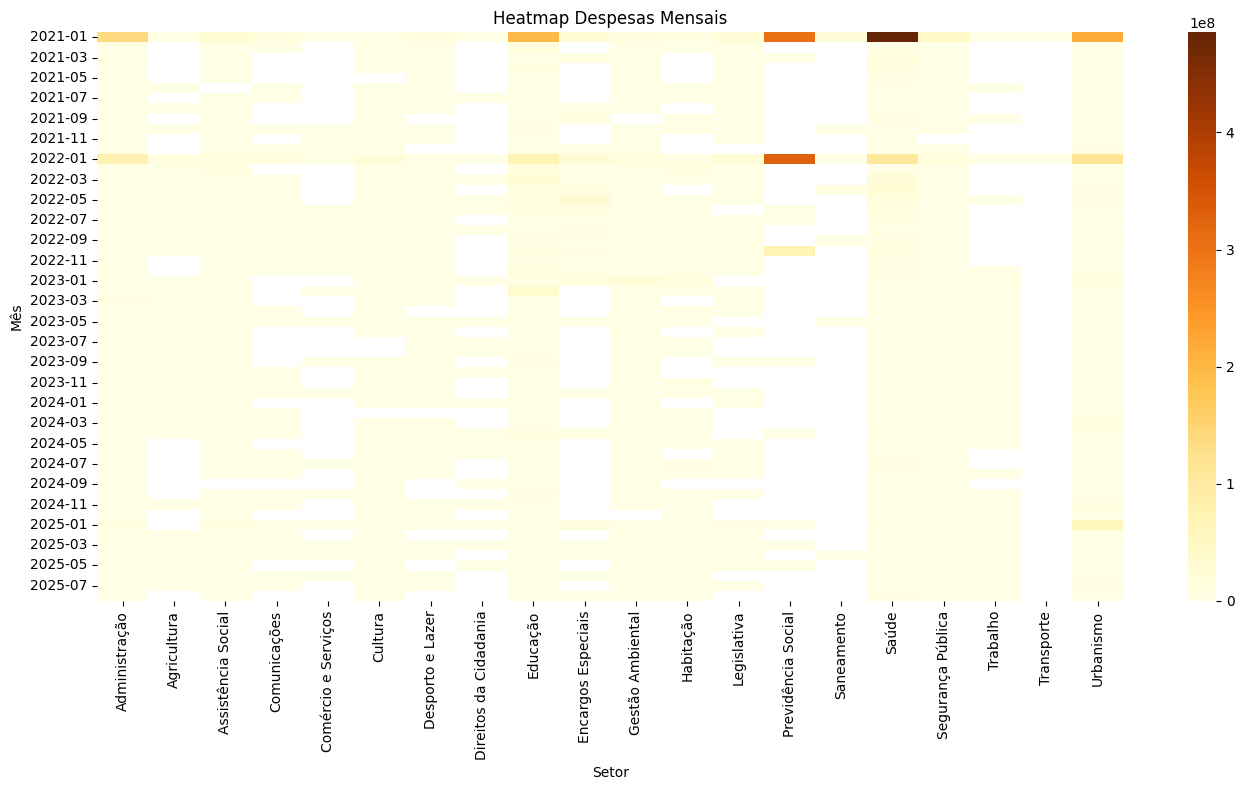

In [230]:
despesas_mensais = df_redux.groupby(['month', 'funcao'])['valor_movimento'].sum().unstack()

plt.figure(figsize=(14, 8))
sns.heatmap(despesas_mensais, annot=False, cmap="YlOrBr")
plt.title('Heatmap Despesas Mensais')
plt.xlabel('Setor')
plt.ylabel('Mês')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()